In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
Sample='carina'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

CarN=dict()
Car=dict()


for i in range(len(samples)):
    CarN[i]=samples[0][i]
    
for i in range(len(samples)):
    Car[i]=pd.read_csv('SFdata//'+CarN[i]+'.csv')    

samples

,0
0,CarB2
1,CarR2
2,Car2


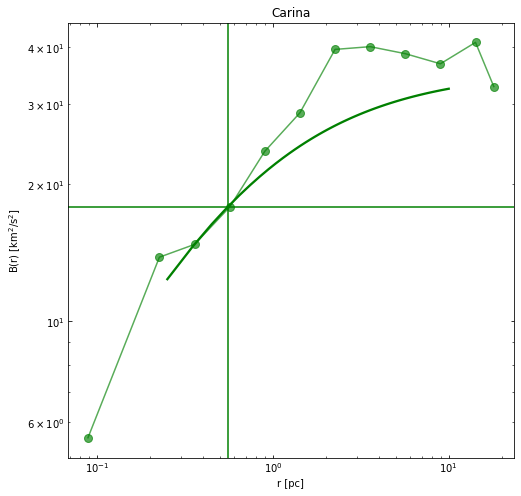

In [4]:
fig, ax=plt.subplots(figsize=(8,8))

#plt.loglog(Car[0].pc,Car[0].S,marker='o',color="blue",alpha=0.65,label="Blue",markersize="8")
#plt.axhline(y=8.1**2, color='blue', linestyle='-')
#plt.axvline(x=1.18, color='blue', linestyle='-')
#plt.axhline(y=2*8.1**2, color='blue', linestyle=':')
#lo=1.18
#ss=8.1**2
#n=1.5
#x=np.linspace(0.25,10,100)
#c=1/(1+(x/lo)**n)
#y=2*(1-c)*ss
#plt.loglog(x,y,color='blue', linestyle='-',linewidth='2.3')

#plt.loglog(Car[1].pc,Car[1].S,marker='o',color="red",alpha=0.65,label="Red",markersize="8")
#plt.axhline(y=7.1**2, color='red', linestyle='-')
#plt.axvline(x=0.57, color='red', linestyle='-')
#lo=0.57
#ss=7.1**2
#n=1.5
#x=np.linspace(0.25,10,100)
#c=1/(1+(x/lo)**n)
#y=2*(1-c)*ss
#plt.loglog(x,y,color='red', linestyle='-',linewidth='2.3')

plt.loglog(Car[2].pc,Car[2].S,marker='o',color="green",alpha=0.65,label="Comb",markersize="8")
plt.axhline(y=4.22**2, color='green', linestyle='-')
plt.axvline(x=0.555, color='green', linestyle='-')
lo=0.55
ss=4.22**2
n=0.8
x=np.linspace(0.25,10,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='green', linestyle='-',linewidth='2.3')

#plt.legend()
plt.title('Carina')

#ax.text(0.1, 0.9,'m = 1.5', ha='center', va='center', transform=ax.transAxes, color='blue')
#ax.text(0.1, 0.85,'m = 1.5', ha='center', va='center', transform=ax.transAxes, color='red')
#ax.text(0.1, 0.8,'m = 0.8', ha='center', va='center', transform=ax.transAxes, color='purple')


ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)
#plt.grid(which='minor')


In [5]:
B=Car[2].S
r=Car[2].pc

In [6]:
rgrid = np.logspace(0.0, 2)

s0 = (0.011*.92)/2.355   
m = 0.8
sig2 = 4.22**2
r0 = 0.55

In [7]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [8]:
relative_uncertainty = 0.2
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 1.5

In [9]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [10]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10, sig2=sig2,
)

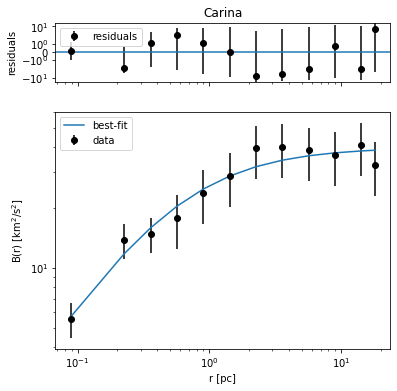

In [11]:
fig, _ = result2.plot( 'ko')
fig.axes[0].set(
    title='Carina',
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale = "log",
    yscale = "log",
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
);

plt.savefig('SFpaper//Carina.pdf', bbox_inches='tight')



In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 12
    # variables        = 5
    chi-square         = 2.02853714
    reduced chi-square = 0.28979102
    Akaike info crit   = -11.3311009
    Bayesian info crit = -8.90656760
##  Warning: uncertainties could not be estimated:
    s0:     at initial value
[[Variables]]
    r0:     0.54770939 (init = 0.55)
    sig2:   19.9920642 (init = 17.8084)
    m:      0.98668359 (init = 0.8)
    s0:     0.00429724 (init = 0.00429724)
    noise:  1.6595e-06 (init = 0.1)


In [13]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.29958  -0.22356  -0.12041   0.54771  +0.18835  +0.66908  +5.81881
 sig2 :  -9.15069  -5.82828  -3.08827  19.99206  +2.09077  +5.43391 +17.55640
 m    :  -0.19734  -0.19523  -0.02586   0.98668  +0.37477  +0.94977  +2.29048
 s0   :      -inf      -inf      -inf   0.00430      +inf      +inf      +inf
 noise:      -inf      -inf      -inf   0.00000      +inf      +inf      +inf


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(s0=0.003867515923566822) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(s0=0.0047269639065816715) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(noise=1.4935231709367614e-06) = 0.0 < max(sigmas).
  warn(errmsg)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(noise=1.8254172089227082e-06) = 0.0 < max(sigmas).
  warn(errmsg)


In [15]:
plt.style.use([
    "seaborn-poster",
])

In [16]:
plot_limits = {
    "s0": [0.0, 0.3],
    "m": [0.1, 3],
    "r0": [0.1, 5.0],
    "noise": [0.0, 2.0],
}

KeyboardInterrupt: 

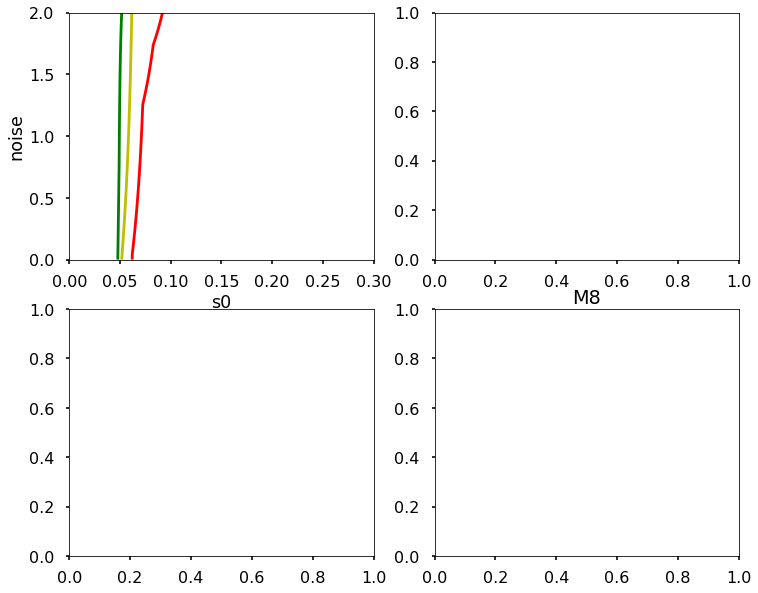

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('M8')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [ ]:
x=r
y=B-2*sig2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

In [ ]:
r.max()/result2.params['r0'].value

In [ ]:
(r[3]/2**0.5)*((result2.params['r0'].value/r[3])**(result2.params['m'].value/2))

In [ ]:
#f = open('CI//Car.pkl',"wb")
#pickle.dump(result2,f)
#f.close()

In [ ]:
print("--- %s seconds ---" % (time.time()-start_time))